In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import timeit
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['KSI_CLEAN.csv']


In [2]:
data = pd.read_csv('../input/KSI_CLEAN.csv')
df = pd.DataFrame(data)
print('The Original Data Size:',df.shape)

The Original Data Size: (12557, 56)


In [3]:
#Drop Unwanted Columns
drop_colmns = ['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_ID',
       'Division', 'District', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER','FATAL']
df_dropped = df.drop(columns=drop_colmns)

#Pick only Automobile Related Accidents
df = df_dropped[df_dropped['AUTOMOBILE']==1]

In [4]:
#Considered Columns after dropping columns
df.columns


Index(['Hood_Name', 'AUTOMOBILE', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY'],
      dtype='object')

In [5]:
#Prepare the Final Dataframe with Neighbourhoods and their Number of Accidents Due to Causes of 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL' and 'DISABILITY'
df_g2=df.groupby(['Hood_Name','SPEEDING']).size().to_frame('count').reset_index()
dfspeed = df_g2.pivot(index='Hood_Name',columns='SPEEDING',values='count')
df_g2=df.groupby(['Hood_Name','AG_DRIV']).size().to_frame('count').reset_index()
dfagdriv = df_g2.pivot(index='Hood_Name',columns='AG_DRIV',values='count')
df_g2=df.groupby(['Hood_Name','REDLIGHT']).size().to_frame('count').reset_index()
dfred = df_g2.pivot(index='Hood_Name',columns='REDLIGHT',values='count')
df_g2=df.groupby(['Hood_Name','ALCOHOL']).size().to_frame('count').reset_index()
dfalco = df_g2.pivot(index='Hood_Name',columns='ALCOHOL',values='count')
df_g2=df.groupby(['Hood_Name','DISABILITY']).size().to_frame('count').reset_index()
dfdisb = df_g2.pivot(index='Hood_Name',columns='DISABILITY',values='count')
dfspeed = dfspeed.drop(dfspeed.columns[0], axis=1)
dfspeed[2] = dfagdriv.drop(dfagdriv.columns[0], axis=1)
dfspeed[3] = dfred.drop(dfred.columns[0], axis=1)
dfspeed[4] = dfalco.drop(dfalco.columns[0], axis=1)
dfspeed[5] = dfdisb.drop(dfalco.columns[0], axis=1)
dfspeed.columns.names = ['Cause'] 
df = dfspeed
df = df.dropna()
print('Key for Causes are SPEEDING(1), AG_DRIV(2), REDLIGHT(3), ALCOHOL(4) and DISABILITY(5)')
df.columns = ['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL','DISABILITY']
df.head(15)

Key for Causes are SPEEDING(1), AG_DRIV(2), REDLIGHT(3), ALCOHOL(4) and DISABILITY(5)


,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY
Hood_Name,,,,,
Agincourt North (129),27.0,74.0,14.0,5.0,8.0
Banbury-Don Mills (42),44.0,100.0,4.0,17.0,3.0
Bayview Village (52),22.0,56.0,16.0,3.0,1.0
Beechborough-Greenbrook (112),6.0,23.0,3.0,3.0,4.0
Bendale (127),19.0,62.0,11.0,11.0,2.0
Black Creek (24),8.0,18.0,4.0,2.0,2.0
Broadview North (57),36.0,40.0,2.0,10.0,7.0
Casa Loma (96),6.0,27.0,3.0,2.0,7.0
Centennial Scarborough (133),16.0,39.0,4.0,2.0,6.0


# K-MEANS CLUSTERING

## Elbow Method to Determine Number of Clusters

In [6]:
#Scale the Data using Standard Scaler
scaler = StandardScaler()
Sum_of_squared_distances = []
std_scale = scaler.fit(df)
df_transformed = std_scale.transform(df)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed)
X = pca.transform(df_transformed)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

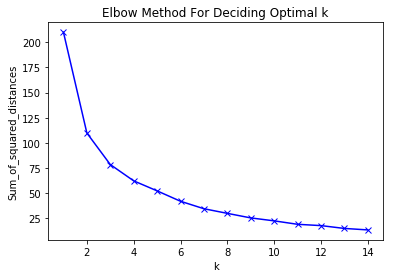

In [7]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Deciding Optimal k')
plt.show()

## Silhouette analysis

For n_clusters = 2 The average silhouette_score is : 0.6628476223029423
For n_clusters = 3 The average silhouette_score is : 0.35697368194117984
For n_clusters = 4 The average silhouette_score is : 0.38784554009782496
For n_clusters = 5 The average silhouette_score is : 0.3962726260351929


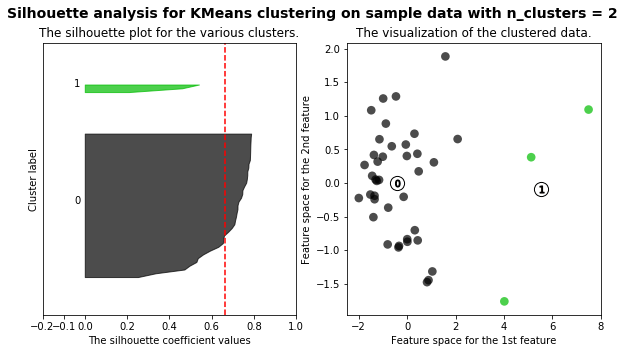

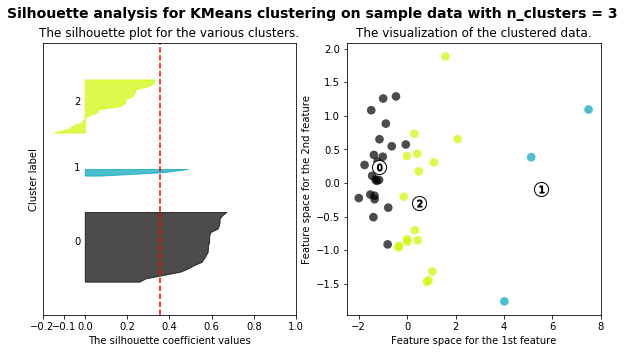

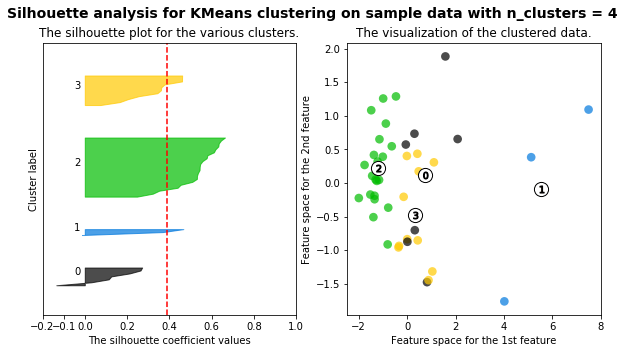

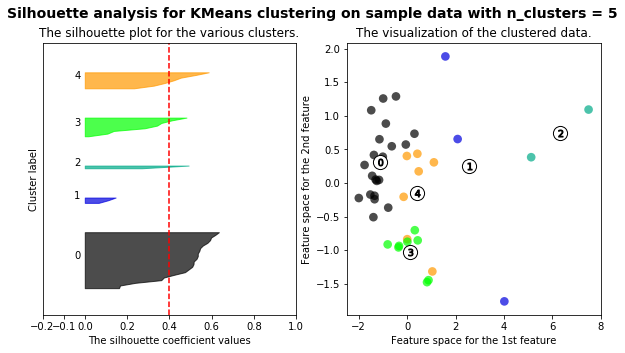

In [8]:

for n_clusters in range(2,6):
    kmeans = KMeans(n_clusters=n_clusters , random_state=3425)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=300, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Hence We go with K=2 Major Accident Prone Zone and Minor Accident Prone Zone

# Clustering Visualization

Index([0, 1, 2, 3, 4, 'label'], dtype='object')
running time is : 0.012358899984974414


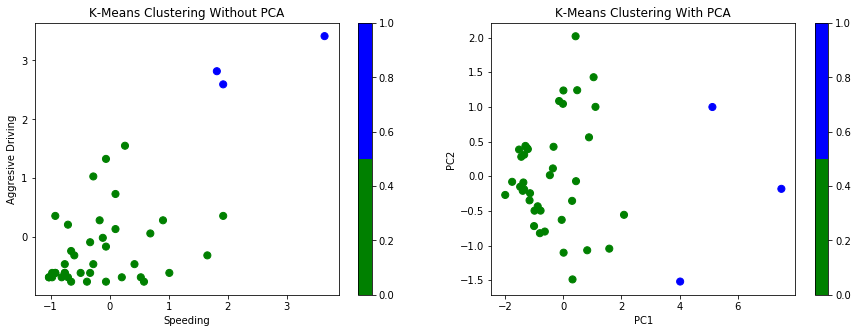

In [9]:
#Plotting the cluster obtained using GMM
kmeans = KMeans(n_clusters=2,random_state=3425)
colors = ['green','blue']


plt.figure(figsize=(15, 5)) 

ax = plt.subplot(121)
kc =kmeans.fit(df_transformed)
label = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(df_transformed)
# label = label.sort_values(by=0)
df_result['label']=label
print(df_result.columns)
scatter = plt.scatter(df_result[0],df_result[2],
                     c=list(label.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Speeding')
plt.ylabel('Aggresive Driving')
plt.colorbar(scatter)


ax = plt.subplot(122)
start = timeit.default_timer()
kc =kmeans.fit(X)
stop = timeit.default_timer()
klabel0 = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(X)
# klabel0 = klabel0.sort_values(by=0)
df_result['label']=klabel0
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(klabel0.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()


In [10]:
#Display Neighboorhoods
print('We Conclude that the Accident Prone Neighborhoods in Toronto by K-Means based on 2007-2017 Data')
neighborhoods = df.index
neighborhoods = np.array(neighborhoods)
print(neighborhoods[np.where(klabel0[0]==1)])
ksafe = neighborhoods[np.where(klabel0[0]==1)]
kaccident = neighborhoods[np.where(klabel0[0]==0)]

We Conclude that the Accident Prone Neighborhoods in Toronto by K-Means based on 2007-2017 Data
['Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)'
 'Woburn (137)']
